# Figure 005 (v001)

sgRNA to gene varying intercepts.

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import janitor  # noqa: F401
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import speclet.plot as sp
from speclet.io import figure_img_file, tables_dir

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sp.set_speclet_theme(sp.PlottingMode.DISSERTATION)

In [5]:
FIGNUM, VERSION = 5, 1
FIGURE_FILE = figure_img_file(FIGNUM, VERSION, "sgrna-gene-intercept")
FIGURE_FILE

PosixPath('/n/data1/hms/dbmi/park/Cook/speclet/figures/figure_005-v001/fig_005-v001_sgrna-gene-intercept.png')

In [6]:
notebook_output_dir = tables_dir() / "100_015_essentiality_comparisons"

### Data

In [7]:
mu_mu_a_post = pd.read_csv(
    notebook_output_dir / "mu_mu_a-posterior-summary.csv"
).astype({"lineage_subtype": "category"})
# mu_a_post = pd.read_csv(notebook_output_dir / "mu_a-posterior-summaries.csv")
mu_a_post_draws = pd.read_csv(
    notebook_output_dir / "kras-mu_a-posterior-draws.csv"
).astype({"lineage_subtype": "category"})
a_post = pd.read_csv(notebook_output_dir / "guide-posterior-summary.csv").astype(
    {"lineage_subtype": "category"}
)
sgrna_corr = pd.read_csv(notebook_output_dir / "sgrna-correlations.csv")

## Figure

### Shared

In [8]:
FIGSIZE = (6.5, 6)
figure = plt.figure(constrained_layout=True, figsize=FIGSIZE)
subfigures = figure.subfigures(nrows=2, ncols=1, height_ratios=(2, 1))

panel_a = subfigures[0]
bottom_panels = subfigures[1].subfigures(ncols=2)
panel_b = bottom_panels[0]
panel_c = bottom_panels[1]

<Figure size 650x600 with 0 Axes>

### a. $a$, $\mu_a$, and $\mu_{\mu_a}$ example with *KRAS*

In [9]:
GENE = "KRAS"
gene_a = a_post.query(f"hugo_symbol == '{GENE}'")
lineages = list(a_post["lineage_subtype"].unique())
lineages.sort()

panel_a.clear()
panel_a.text(0, 0.98, r"$\textbf{a}$", fontsize=8)
ax = panel_a.subplots()

sns.violinplot(
    data=mu_a_post_draws,
    x="lineage_subtype",
    y="mu_a",
    linewidth=0,
    color="#8BE2FF",
    width=0.7,
    saturation=0.7,
    scale="width",
    ax=ax,
)

for line in lineages:
    a_df = (
        gene_a.copy()
        .query(f"lineage_subtype == '{line}'")
        .assign(x=lambda d: d["lineage_subtype"].cat.codes)
        .assign(x=lambda d: d["x"] + np.linspace(-0.2, 0.2, len(d)))
    )
    sns.scatterplot(
        data=a_df, x="x", y="mean", ax=ax, color="k", s=2, edgecolor=None, zorder=15
    )
    ax.vlines(
        x=a_df["x"],
        ymin=a_df["hdi_5.5%"],
        ymax=a_df["hdi_94.5%"],
        color="k",
        lw=0.7,
        alpha=0.5,
        zorder=5,
    )

    mu_mu_a = mu_mu_a_post.query(f"lineage_subtype == '{line}'")
    line_x = list(mu_mu_a["lineage_subtype"].cat.codes)[0]
    ax.hlines(
        y=mu_mu_a["mean"].values[0],
        xmin=line_x - 0.5,
        xmax=line_x + 0.5,
        color="tab:blue",
        lw=0.8,
    )
    hdi_low = mu_mu_a["hdi_5.5%"].values[0]
    hdi_high = mu_mu_a["hdi_94.5%"].values[0]
    ax.fill_between(
        x=[line_x - 0.5, line_x + 0.5],
        y1=[hdi_low] * 2,
        y2=[hdi_high] * 2,
        color="tab:blue",
        alpha=0.2,
    )

for i in range(len(lineages) - 1):
    ax.axvline(i + 0.5, c="w", zorder=100, lw=0.8)

ax.set_xlim(-0.5, len(lineages) - 0.5)
ax.set_ylabel(r"intercepts of $\textit{KRAS}$")
ax.set_xlabel(None)
ax.tick_params("x", rotation=90)

### b. sgRNA correlations

In [10]:
sgrna_corr["spear_corr"].mean()

0.3147130822597465

In [11]:
panel_b.clear()
panel_b.text(0, 0.98, r"$\textbf{b}$", fontsize=8)
ax = panel_b.subplots()

ax.axvline(0, c="k", lw=0.5, zorder=1)
sns.kdeplot(data=sgrna_corr, x="spear_corr", lw=1, fill=True, ax=ax, zorder=5)
ax.set_xlabel("sgRNA spearman corr.")
ax.set_ylabel("density")

Text(0, 0.5, 'density')

### c. sgRNA correlations against $\mu_a$

In [12]:
panel_c.clear()
panel_c.text(0, 0.98, r"$\textbf{c}$", fontsize=8)
ax = panel_c.subplots()

ax.axvline(0, c="k", lw=0.5, zorder=1)
ax.axhline(0, c="k", lw=0.5, zorder=1)
sns.scatterplot(
    data=sgrna_corr,
    x="mu_a",
    y="spear_corr",
    edgecolor=None,
    s=3,
    alpha=0.5,
    ax=ax,
    zorder=5,
)
ax.set_ylabel("sgRNA spearman corr.")
ax.set_xlabel(r"average gene effect, $\mu_a$")

Text(0.5, 0, 'average gene effect, $\\mu_a$')

## Saving

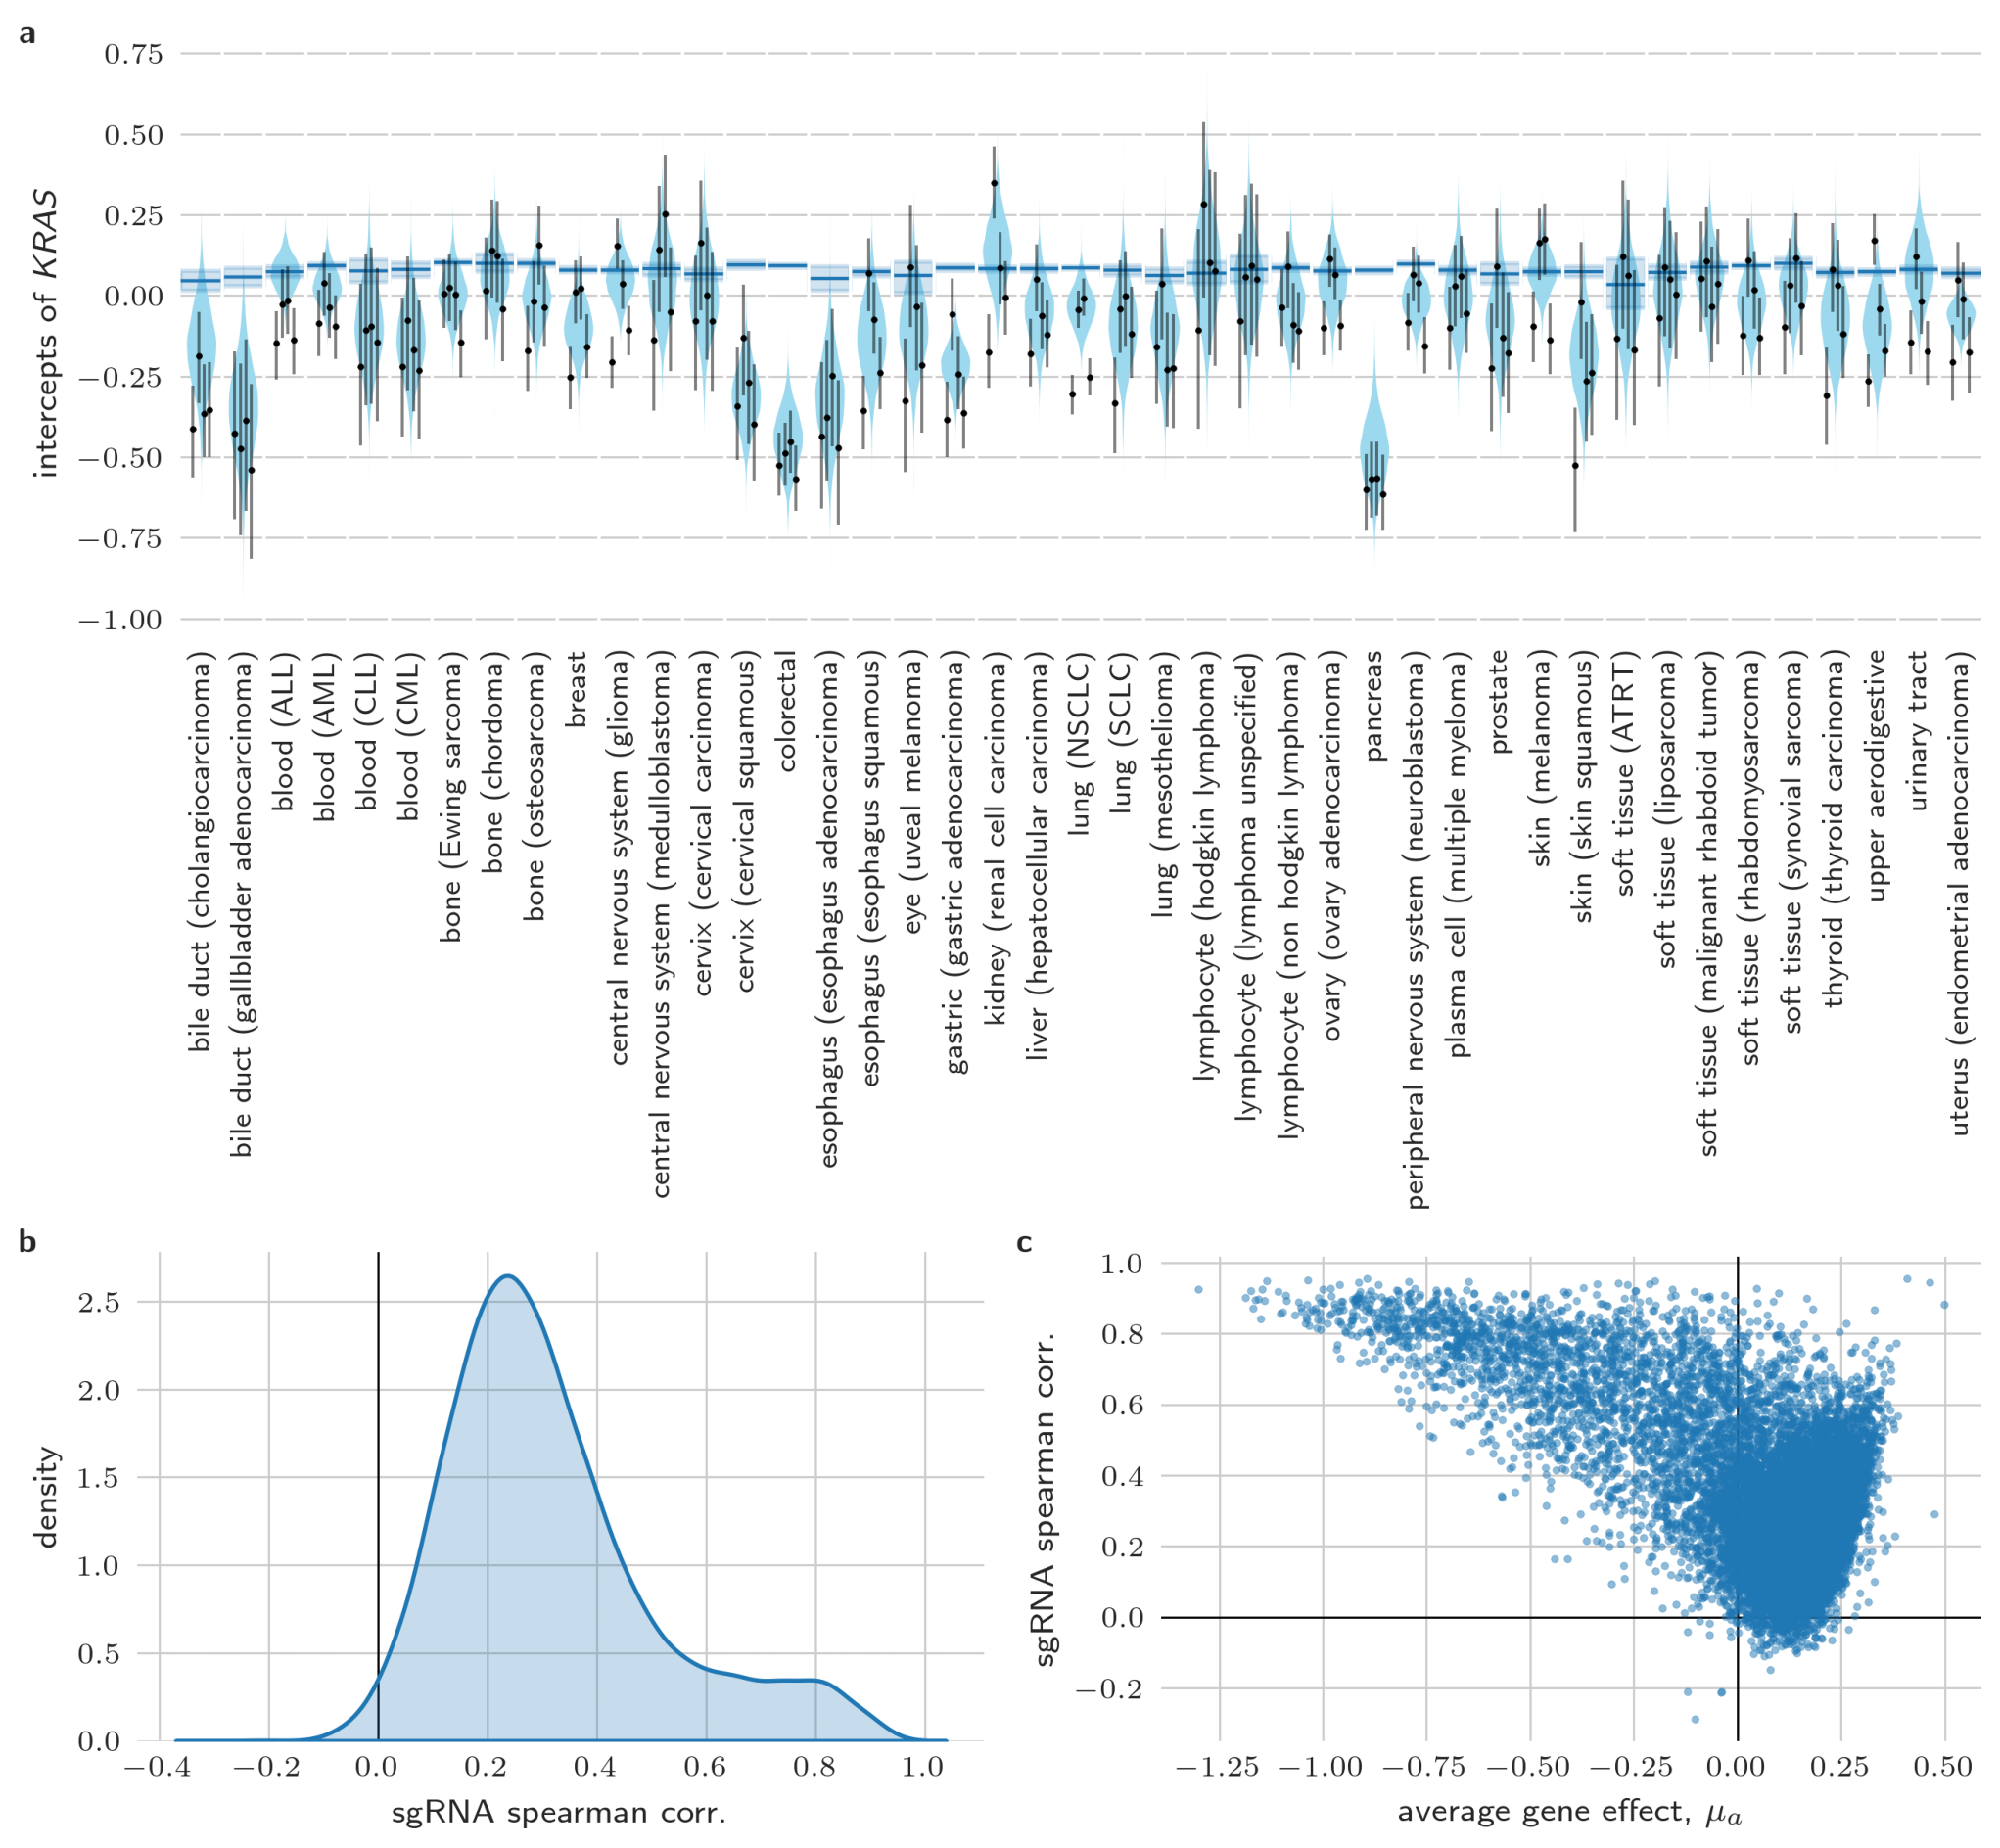

In [13]:
figure.savefig(FIGURE_FILE, dpi=400, pad_inches=0, bbox_inches="tight")

_, ax = plt.subplots(figsize=[x * 2 for x in FIGSIZE])
ax.imshow(plt.imread(FIGURE_FILE))
ax.axis("off")
plt.show()

---

## Session Info

In [14]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2022-10-23

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

Compiler    : GCC 10.4.0
OS          : Linux
Release     : 3.10.0-1160.76.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 28
Architecture: 64bit

Hostname: compute-e-16-236.o2.rc.hms.harvard.edu

Git branch: figures

janitor   : 0.22.0
numpy     : 1.23.3
matplotlib: 3.5.3
speclet   : 0.0.9000
pandas    : 1.4.4
seaborn   : 0.11.2

